In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

#Load Data
df = pd.read_csv("/content/youtube_text.csv", encoding='latin1')

#'title' is the text and 'category' is the label
df.dropna(subset=["title", "category"], inplace=True)

# Encode category labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

# Tokenize titles
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["title"])
sequences = tokenizer.texts_to_sequences(df["title"])
X = pad_sequences(sequences, maxlen=50)

y = df["label"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#CNN Model
from tensorflow.keras.utils import to_categorical

# Determine number of unique categories (for output layer)
num_classes = len(np.unique(y_train))

cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"\nCNN Accuracy: {cnn_accuracy:.4f}")


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4466 - loss: 1.2011 - val_accuracy: 0.9444 - val_loss: 0.1787
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9666 - loss: 0.1177 - val_accuracy: 0.9792 - val_loss: 0.0830
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9945 - loss: 0.0266 - val_accuracy: 0.9722 - val_loss: 0.0908
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9985 - loss: 0.0118 - val_accuracy: 0.9688 - val_loss: 0.0958
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9959 - loss: 0.0116 - val_accuracy: 0.9688 - val_loss: 0.0955
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9740 - loss: 0.0680

CNN Accuracy: 0.9694


In [5]:
#LSTM Model

# Determine number of output classes
num_classes = len(np.unique(y_train))

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(num_classes, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# Evaluate model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")

Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.5932 - loss: 1.1474 - val_accuracy: 0.9271 - val_loss: 0.2385
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9643 - loss: 0.1460 - val_accuracy: 0.9514 - val_loss: 0.1477
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9839 - loss: 0.0612 - val_accuracy: 0.9722 - val_loss: 0.1100
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9926 - loss: 0.0318 - val_accuracy: 0.9618 - val_loss: 0.1244
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.9962 - loss: 0.0183 - val_accuracy: 0.9618 - val_loss: 0.1440
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9608 - loss: 0.0984
LSTM Accuracy: 0.9639


In [6]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

label_to_test = 0

# Count occurrences of that label in train and test sets
count_train = np.sum(y_train == label_to_test)
count_test = np.sum(y_test == label_to_test)

# Total counts in each group
n_train = len(y_train)
n_test = len(y_test)

# Perform two-sample Z-test for proportions
z_stat, z_p = proportions_ztest([count_train, count_test], [n_train, n_test])
print(f"\nZ-Test for label {label_to_test}: Z={z_stat:.4f}, p-value={z_p:.4f}")


Z-Test for label 0: Z=1.8408, p-value=0.0657


In [7]:
#Statistical Analysis - T-Test on encoded labels (not ideal)

from scipy import stats

# Perform t-test on the encoded labels
t_stat, t_p = stats.ttest_ind(y_test.astype(float), y_train.astype(float), equal_var=False)
print(f"T-Test: T={t_stat:.4f}, p-value={t_p:.4f}")


T-Test: T=2.4955, p-value=0.0127


In [8]:
#Type I Error
alpha = 0.05  # significance level
type1_error = z_p < alpha
print(f"Type I Error (False Positive): {type1_error}")

Type I Error (False Positive): False


In [9]:
#Type II Error (Simulated)

# Significance level
alpha = 0.05

# Assumed effect size
effect_size = 0.1
n = len(y_test)

# Simulate Type II Error (beta) assuming normal distribution under H1
z_beta = stats.norm.ppf(1 - alpha) - effect_size * np.sqrt(n)
beta = 1 - stats.norm.cdf(z_beta)

print(f"Type II Error (Simulated): {beta:.4f}")


Type II Error (Simulated): 0.8505


In [10]:
# ANOVA
grouped = [df[df["label"] == i]["label"].values for i in np.unique(df["label"])]
anova_stat, anova_p = stats.f_oneway(*grouped)
print(f"ANOVA: F={anova_stat:.4f}, p-value={anova_p:.4f}")

ANOVA: F=inf, p-value=0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


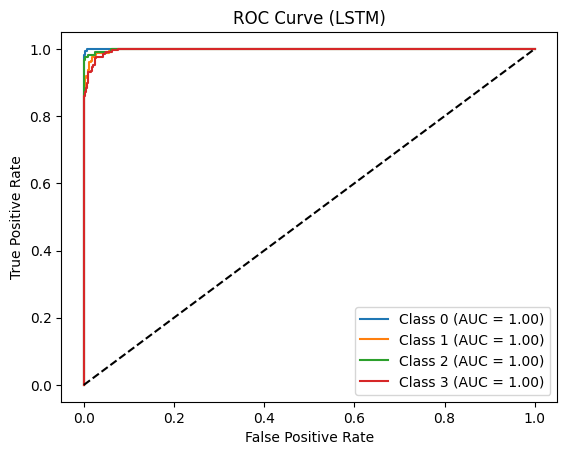

In [11]:
#ROC Curve (for LSTM)
y_score_lstm = lstm_model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Get the number of classes from the predictions
num_classes = y_score_lstm.shape[1]

# Iterate over the classes
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_lstm[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve (LSTM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [15]:
# Import necessary library
from tensorflow.keras.utils import to_categorical

# Perform one-hot encoding on y_train
y_train_cat = to_categorical(y_train, num_classes=num_classes)

# Build a simple LSTM model
lstm_model = Sequential([
    LSTM(16, input_shape=(X_train.shape[1], 1)),
    Dense(y_train_cat.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape X_train for LSTM input (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Train the model
lstm_model.fit(X_train_reshaped, y_train_cat, epochs=10, batch_size=16, verbose=1)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.3248 - loss: 1.3582
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3510 - loss: 1.2954
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4111 - loss: 1.2513
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5038 - loss: 1.1459
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5118 - loss: 1.1332
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5451 - loss: 1.0711
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5481 - loss: 1.0632
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5620 - loss: 1.0291
Epoch 9/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5902 - loss: 1.0131
Epoch 10/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5746 - loss: 1.0083


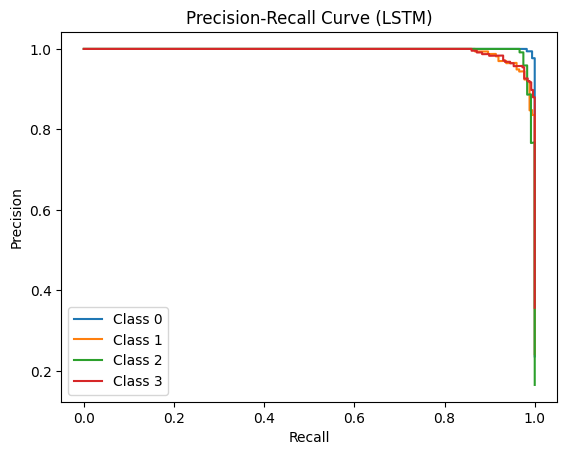

In [16]:
from sklearn.metrics import precision_recall_curve, classification_report
#Precision-Recall Curve (LSTM)
precision = dict()
recall = dict()

# Get the number of classes from the predictions
num_classes = y_score_lstm.shape[1]

for i in range(num_classes):
    y_test_one_hot = np.eye(num_classes)[y_test]
    precision[i], recall[i], _ = precision_recall_curve(y_test_one_hot[:, i], y_score_lstm[:, i])
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.title("Precision-Recall Curve (LSTM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

# CNN model
num_classes = y_train_cat.shape[1]

cnn_model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(50,1)),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train CNN
cnn_model.fit(X_train[:,:,None], y_train_cat, epochs=10, batch_size=16, verbose=1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2685 - loss: 41.6960
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2886 - loss: 10.4918
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3101 - loss: 11.3739
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3090 - loss: 9.9654
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3049 - loss: 8.6787
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3106 - loss: 7.8269
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3140 - loss: 6.3376
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3119 - loss: 6.2617
Epoch 9/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3145 - loss: 6.1878
Epoch 10/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3200 - loss: 5.3527


In [18]:
# No need to apply np.argmax()
y_test_labels = y_test

In [19]:
#Classification Reports
# y_test is already 1D labels
y_test_labels = y_test

y_pred_lstm = np.argmax(y_score_lstm, axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)

print("\nClassification Report (LSTM):")
print(classification_report(y_test_labels, y_pred_lstm, target_names=label_encoder.classes_))

print("\nClassification Report (CNN):")
print(classification_report(y_test_labels, y_pred_cnn, target_names=label_encoder.classes_))


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report (LSTM):
              precision    recall  f1-score   support

   art_music       0.96      1.00      0.98       170
        food       0.95      0.96      0.96       174
     history       1.00      0.95      0.97       119
      travel       0.96      0.95      0.95       257

    accuracy                           0.96       720
   macro avg       0.97      0.96      0.97       720
weighted avg       0.96      0.96      0.96       720


Classification Report (CNN):
              precision    recall  f1-score   support

   art_music       0.42      0.44      0.43       170
        food       0.24      0.49      0.32       174
     history       0.19      0.26      0.22       119
      travel       0.40      0.04      0.07       257

    accuracy                           0.28       720
   macro avg       0.31      0.31      0.26       720
weighted avg       0.33      0.28      0.24       720



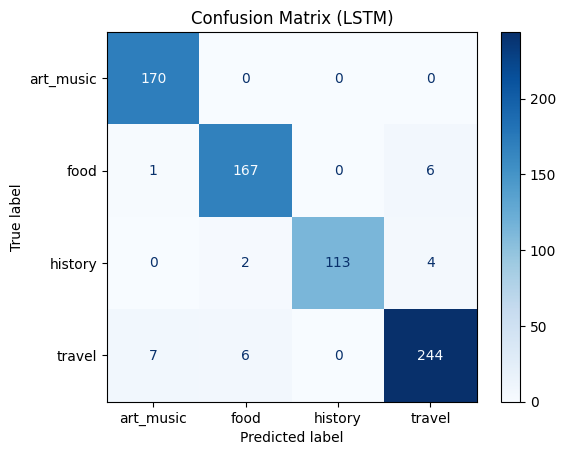

In [20]:
#Confusion Matrix for LSTM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Convert y_test from one-hot to labels first

cm_lstm = confusion_matrix(y_test_labels, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=label_encoder.classes_)
disp_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix (LSTM)")
plt.show()


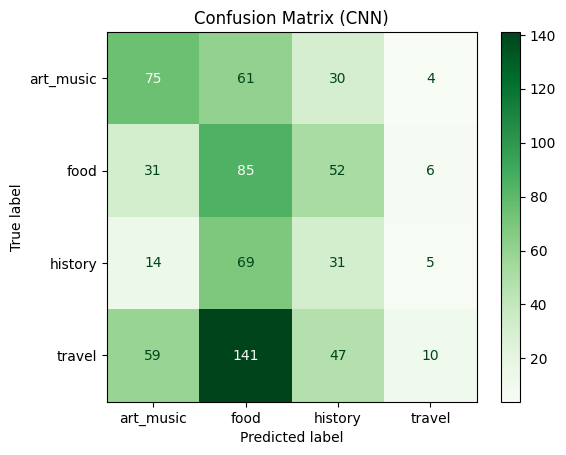

In [21]:
#Confusion Matrix for CNN
cm_cnn = confusion_matrix(y_test_labels, y_pred_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=label_encoder.classes_)
disp_cnn.plot(cmap="Greens")
plt.title("Confusion Matrix (CNN)")
plt.show()